# Air quality complaints via 311

For Writing with Data class

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import re
from plotnine import *
pd.set_option("display.max_columns", None)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read all CSVs

The first CSV is a compilation of air quality complaints from 2011-February 3, 2022. The succeeding ones are for previous years as well as for the rest of February 2022.

In [40]:
df= pd.read_csv('air_quality.csv')
df

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,due_date,resolution_description,resolution_action_updated_date,borough,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude
0,0,19510783,2011-01-01 13:26:00,02/07/2011 01:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Restaurant (AD2)",NaN,525 W 42 ST,W 42 ST,AMTRAK RR,11 AVE,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection obs...,02/07/2011 01:00:00 PM,MANHATTAN,UNKNOWN,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760159,-73.996712
1,1,19510790,2011-01-01 13:42:00,01/07/2011 03:45:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Soot, Other (Use Comments) (AB4)",NaN,247 W 102 ST,W 102 ST,BROADWAY,W END AVE,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection obs...,01/07/2011 03:45:00 PM,MANHATTAN,UNKNOWN,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.798732,-73.969585
2,2,19510799,2011-01-01 14:06:00,01/10/2011 01:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Residential (AA1)",NaN,241 W 110 ST,W 110 ST,7 AVE,FRED DOUGLASS CIRCLE,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection obs...,01/10/2011 01:00:00 PM,MANHATTAN,UNKNOWN,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.799911,-73.956405
3,3,19510818,2011-01-01 15:17:00,01/11/2011 03:45:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Other (Use Comments) (AA5)",NaN,1270 5 AVE,5 AVE,E 108 ST,E 109 ST,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection obs...,01/11/2011 03:45:00 PM,MANHATTAN,UNKNOWN,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.795678,-73.950080
4,4,19510840,2011-01-01 16:09:00,01/11/2011 05:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Restaurant (AD2)",NaN,253 W 91 ST,W 91 ST,BROADWAY,W END AVE,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection did...,01/11/2011 05:00:00 PM,MANHATTAN,UNKNOWN,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.791701,-73.974637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83675,83675,53264140,2022-02-03 17:20:00,NaN,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,650 MANHATTAN AVENUE,MANHATTAN AVENUE,BEDFORD AVE,NORMAN AVE,NaN,NaN,BROOKLYN,NaN,Open,NaN,NaN,NaN,BROOKLYN,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724464,-73.951172
83676,83676,53265306,2022-02-03 17:35:00,NaN,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,115-07 141 STREET,141 STREET,115 AVE,116 AVE,NaN,NaN,JAMAICA,NaN,Open,NaN,NaN,NaN,QUEENS,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681759,-73.801541
83677,83677,53265293,2022-02-03 21:18:00,NaN,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,3525 HULL AVENUE,HULL AVENUE,E GUN HILL RD,E 211 ST,NaN,NaN,BRONX,NaN,Open,NaN,NaN,NaN,BRONX,ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.879270,-73.873361
83678,83678,53261910,2022-02-03 21:39:00,NaN,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Restaurant (AD2)",NaN,101-15 QUEENS BOULEVARD,QUEENS BOULEVARD,67 RD,QUEENS BLVD,NaN,NaN,FOREST HILLS,NaN,Open,NaN,NaN,NaN,QUEENS,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726407,-73.851803


In [4]:
df.created_date = pd.to_datetime(df.created_date)

In [5]:
df2= pd.read_csv('2010.csv')

In [6]:
df3=pd.read_csv('2009.csv')

In [7]:
df4=pd.read_csv('2008.csv')

In [8]:
df5=pd.read_csv('2007.csv')

In [9]:
df6=pd.read_csv('2006.csv')

In [10]:
df7=pd.read_csv('2005.csv')

In [11]:
df8=pd.read_csv('2004.csv')

In [12]:
df9=pd.read_csv('feb2022.csv')

## Clean all dataframes

This includes dropping unnecessary columns for analysis, renaming columns, and transforming dates into datetime format.

In [13]:
df2.columns = df2.columns.str.replace(" ", "_")
df2.columns = df2.columns.str.lower()
df2 = df2.drop(["x_coordinate_(state_plane)", "y_coordinate_(state_plane)", "community_board", "address_type", "incident_zip", "facility_type", "bbl", "location"], axis=1)
df2.created_date = pd.to_datetime(df2.created_date)

In [14]:
df3.columns = df3.columns.str.replace(" ", "_")
df3.columns = df3.columns.str.lower()
df3 = df3.drop(["x_coordinate_(state_plane)", "y_coordinate_(state_plane)", "community_board", "address_type", "incident_zip", "facility_type", "location"], axis=1)
df3.created_date = pd.to_datetime(df3.created_date)

In [15]:
df4.columns = df4.columns.str.replace(" ", "_")
df4.columns = df4.columns.str.lower()
df4 = df4.drop(["x_coordinate_(state_plane)", "y_coordinate_(state_plane)", "community_board", "address_type", "incident_zip", "facility_type", "location"], axis=1)
df4.created_date = pd.to_datetime(df4.created_date)

In [16]:
df5.columns = df5.columns.str.replace(" ", "_")
df5.columns = df5.columns.str.lower()
df5 = df5.drop(["x_coordinate_(state_plane)", "y_coordinate_(state_plane)", "community_board", "address_type", "incident_zip", "facility_type", "location"], axis=1)
df5.created_date = pd.to_datetime(df5.created_date)

In [17]:
df6.columns = df6.columns.str.replace(" ", "_")
df6.columns = df6.columns.str.lower()
df6 = df6.drop(["x_coordinate_(state_plane)", "y_coordinate_(state_plane)", "community_board", "address_type", "incident_zip", "facility_type", "location"], axis=1)
df6.created_date = pd.to_datetime(df6.created_date)

In [18]:
df7.columns = df7.columns.str.replace(" ", "_")
df7.columns = df7.columns.str.lower()
df7 = df7.drop(["x_coordinate_(state_plane)", "y_coordinate_(state_plane)", "community_board", "address_type", "incident_zip", "facility_type", "location"], axis=1)
df7.created_date = pd.to_datetime(df7.created_date)

In [19]:
df8.columns = df8.columns.str.replace(" ", "_")
df8.columns = df8.columns.str.lower()
df8 = df8.drop(["x_coordinate_(state_plane)", "y_coordinate_(state_plane)", "community_board", "address_type", "incident_zip", "facility_type", "location"], axis=1)
df8.created_date = pd.to_datetime(df8.created_date)

In [20]:
df9.columns = df9.columns.str.replace(" ", "_")
df9.columns = df9.columns.str.lower()
df9 = df9.drop(["x_coordinate_(state_plane)", "y_coordinate_(state_plane)", "community_board", "address_type", "incident_zip", "facility_type", "location"], axis=1)
df9.created_date = pd.to_datetime(df9.created_date)

## Combine all dfs into one single dataframe

We will call it **df_final**.

In [21]:
df_final= pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9])

In [22]:
df_final = df_final.reset_index()
df_final = df_final.drop('index', axis=1)
df_final =df_final.sort_values('created_date')
#df_final = df_final.drop('index', axis=1)
df_final

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,due_date,resolution_description,resolution_action_updated_date,borough,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,school_name,school_number,school_region,school_code,school_phone_number,school_address,school_city,school_state,school_zip,school_not_found,school_or_citywide_complaint,garage_lot_name,ferry_direction,ferry_terminal_name,bbl
139981,NaN,12225042,2004-01-02 00:00:00,01/07/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,74 BAY RDGE AVE,BAY RDGE AVE,NARROWS AVE,BLISS TERR,NaN,NaN,NaN,NaN,Closed,NaN,NaN,01/07/2004 12:00:00 AM,BROOKLYN,NaN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
145141,NaN,12225043,2004-02-02 00:00:00,02/03/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,1208 OAK POINT AVENUE,OAK POINT AVENUE,TIFFANY STREET,CASANOVA STREET,NaN,NaN,BRONX,NaN,Closed,NaN,NaN,02/03/2004 12:00:00 AM,BRONX,NaN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.809689,-73.889591,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
143351,NaN,3850853,2004-02-17 00:00:00,02/19/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Residential (AA1)",NaN,NaN,NaN,NaN,NaN,AVENUE W,BATCHELDER STREET,BROOKLYN,NaN,Closed,NaN,NaN,02/19/2004 12:00:00 AM,BROOKLYN,NaN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.596232,-73.938188,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
141592,NaN,12225044,2004-02-23 00:00:00,02/25/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,130 DUPONT STREET,DUPONT STREET,MANHATTAN AVENUE,MC GUINNESS BOULEVARD,NaN,NaN,BROOKLYN,NaN,Closed,NaN,NaN,02/25/2004 12:00:00 AM,BROOKLYN,NaN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.735922,-73.954534,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
146759,NaN,12225045,2004-02-24 00:00:00,02/25/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,655 HUMBOLDT STREET,HUMBOLDT STREET,DRIGGS AVENUE,NASSAU AVENUE,NaN,NaN,BROOKLYN,NaN,Closed,NaN,NaN,02/25/2004 12:00:00 AM,BROOKLYN,NaN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724623,-73.945295,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147233,NaN,53483347,2022-02-27 15:41:00,03/02/2022 06:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Vehicular (AA4)",NaN,48 AMADOR STREET,AMADOR STREET,KNOLLWOOD CT,BRIARWOOD RD,NaN,NaN,STATEN ISLAND,NaN,Closed,NaN,The Department of Environmental Protection did...,03/02/2022 06:00:00 PM,STATEN ISLAND,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623478,-74.164104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.016700e+09
147823,NaN,53484153,2022-02-27 17:48:00,02/28/2022 05:45:00 PM,DEP,Department of Environmental Pr

## Re-checking data types

In [23]:
df_final.dtypes

Unnamed: 0                               float64
unique_key                                 int64
created_date                      datetime64[ns]
closed_date                               object
agency                                    object
agency_name                               object
complaint_type                            object
descriptor                                object
location_type                            float64
incident_address                          object
street_name                               object
cross_street_1                            object
cross_street_2                            object
intersection_street_1                     object
intersection_street_2                     object
city                                      object
landmark                                 float64
status                                    object
due_date                                  object
resolution_description                    object
resolution_action_up

## 311 complaints by borough

All about air quality.

Step by step:

1. Group complaints by borough and resample them by month
2. Create a pivot table (wide data)
3. Transform pivot table to long data
4. Plot data

In [24]:
df_final_2 =  df_final.groupby('borough') \
.resample('M', on="created_date") \
.count() \
.drop(['created_date', 'borough'], axis=1)

In [25]:
df_final_pivot = df_final_2.pivot_table (columns="borough", index="created_date", values="unique_key", aggfunc="sum", fill_value="0")

df_final_pivot = df_final_pivot.reset_index()
df_final_pivot

borough,created_date,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
0,2004-01-31,0,1.0,0,0,0,0
1,2004-02-29,1.0,4.0,0,0,0,0
2,2004-03-31,9.0,4.0,1.0,0,0,0
3,2004-04-30,78.0,156.0,437.0,118.0,16.0,0
4,2004-05-31,74.0,194.0,376.0,126.0,22.0,0
...,...,...,...,...,...,...,...
213,2021-10-31,84.0,173.0,727.0,175.0,34.0,0
214,2021-11-30,50.0,146.0,689.0,195.0,18.0,0
215,2021-12-31,50.0,106.0,643.0,194.0,11.0,0
216,2022-01-31,47.0,113.0,763.0,215.0,19.0,0


In [26]:
df_final_pivot = pd.melt(df_final_pivot, id_vars=['created_date'], value_name='unique_key', var_name='borough') \
.sort_values('borough')

In [27]:
df_final_pivot = df_final_pivot.reset_index()
df_final_pivot = df_final_pivot.drop('index', axis=1)

In [28]:
df_final_pivot['unique_key'] = df_final_pivot['unique_key'].astype('float')

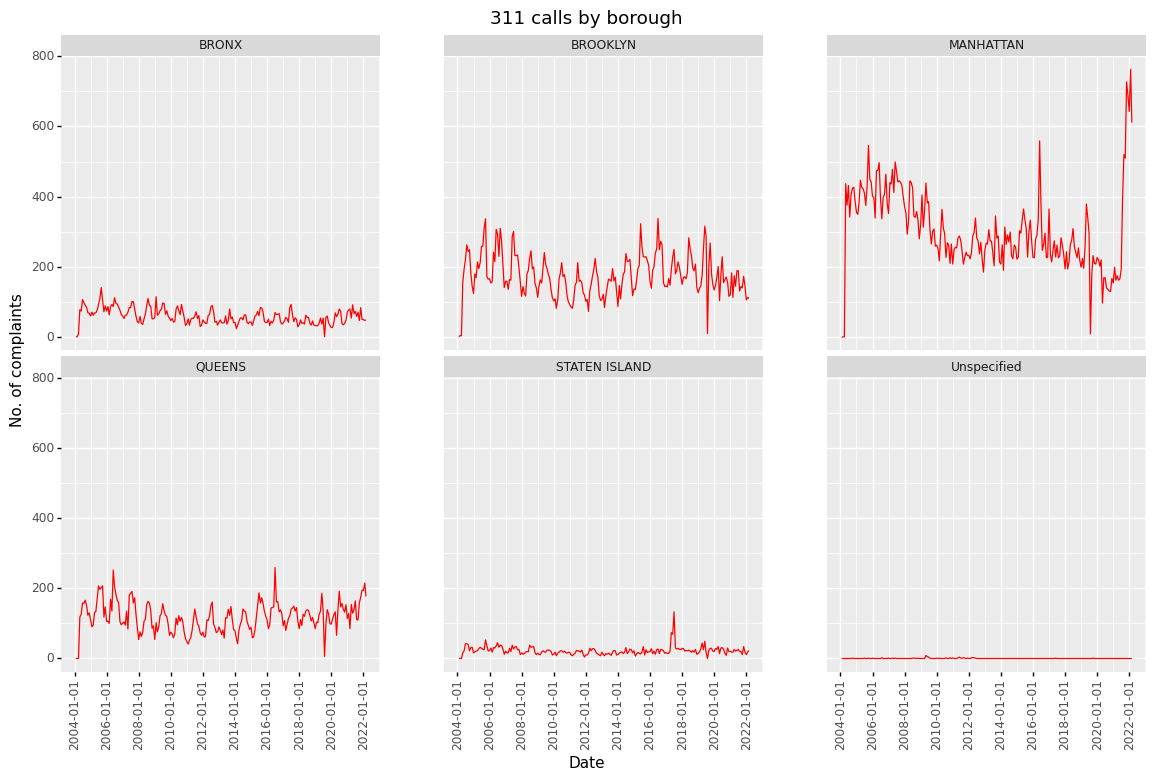

<ggplot: (306791953)>

In [68]:
plt= (
    ggplot(df_final_pivot, aes('created_date', 'unique_key')) +
           geom_line(color="red") +
           theme(figure_size=(14,8)) +
           facet_wrap('borough') +
           theme(subplots_adjust={'wspace': 0.2}, axis_text_x=element_text(rotation=90)) +
           labs(x= "Date", y="No. of complaints", title="311 calls by borough")
)
plt

#ggsave(plt, "311.svg")

## Segregate complaints by borough

So essentially, each borough will have its own dataframe

### Manhattan

In [30]:
manhattan = ['MANHATTAN']
manhattan = df_final[df_final['borough'].isin(manhattan)] \
.sort_values('created_date', ascending=False)
manhattan.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,due_date,resolution_description,resolution_action_updated_date,borough,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,school_name,school_number,school_region,school_code,school_phone_number,school_address,school_city,school_state,school_zip,school_not_found,school_or_citywide_complaint,garage_lot_name,ferry_direction,ferry_terminal_name,bbl
147816,NaN,53479198,2022-02-27 22:21:00,02/28/2022 05:13:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,3 SYLVAN TERRACE,SYLVAN TERRACE,JUMEL TER,ST NICHOLAS AVE,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection wil...,02/28/2022 05:13:00 AM,MANHATTAN,ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.834626,-73.939155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.021090e+09
147234,NaN,53478204,2022-02-27 09:54:00,03/01/2022 12:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Restaurant (AD2)",NaN,18 GREENWICH AVENUE,GREENWICH AVENUE,W 10 ST,CHARLES ST,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection did...,03/01/2022 12:00:00 PM,MANHATTAN,ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734833,-74.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.006060e+09
147678,NaN,53474622,2022-02-26 11:34:00,02/28/2022 05:01:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,1280 3 AVENUE,3 AVENUE,E 73 ST,E 74 ST,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection wil...,02/28/2022 05:01:00 AM,MANHATTAN,ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.770779,-73.959868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.014080e+09
147905,NaN,53472591,2022-02-26 10:11:00,02/28/2022 05:01:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,825 7 AVENUE,7 AVENUE,W 53 ST,W 54 ST,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection wil...,02/28/2022 05:01:00 AM,MANHATTAN,ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.763154,-73.981745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.010068e+09
147679,NaN,53477537,2022-02-26 08:09:00,02/28/2022 05:01:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,5000 BROADWAY,BROADWAY,W 212 ST,W 213 ST,NaN,NaN,NEW YORK,NaN,Closed,NaN,The Department of Environmental Protection wil...,02/28/2022 05:01:00 AM,MANHATTAN,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.868535,-73.918407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022300e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144996,NaN,2903510,2004-04-01 00:00:00,04/08/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Restaurant (AD2)",NaN,251 WEST 72 STREET,WEST 72 STREET,BROADWAY,WEST END AVENUE,NaN,NaN,NEW YORK,NaN,Closed,NaN,NaN,04/08/2004 12:00:00 AM,MANHATTAN,NaN,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.779316,-73.983279,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
145572,NaN,2906262,2004-04-01 00:00:00,04/06/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Residential (AA1)",NaN,514 WEST 184 STREET,WEST 184 STREET,AMSTERDAM AVENUE,AUDUBON AVENUE,NaN,N

### Bronx

In [31]:
bronx = ['BRONX']
bronx = df_final[df_final['borough'].isin(bronx)] \
.sort_values('created_date', ascending=False)
bronx.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,due_date,resolution_description,resolution_action_updated_date,borough,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,school_name,school_number,school_region,school_code,school_phone_number,school_address,school_city,school_state,school_zip,school_not_found,school_or_citywide_complaint,garage_lot_name,ferry_direction,ferry_terminal_name,bbl
147228,NaN,53469723,2022-02-25 12:25:00,02/28/2022 11:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,430 EAST 142 STREET,EAST 142 STREET,WILLIS AVE,BROOK AVE,NaN,NaN,BRONX,NaN,Closed,NaN,The Department of Environmental Protection did...,02/28/2022 11:00:00 AM,BRONX,ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.811158,-73.919879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022860e+09
147217,NaN,53457320,2022-02-24 16:25:00,02/28/2022 01:45:00 PM,DEP,Department of Environmental Protection,Air Quality,Air: Other Air Problem (Use Comments) (AZZ),NaN,950 CRANFORD AVENUE,CRANFORD AVENUE,SETON AVE,BX-WESTCHESTER CNTY BNDY,NaN,NaN,BRONX,NaN,Closed,NaN,The Department of Environmental Protection did...,02/28/2022 01:45:00 PM,BRONX,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.903997,-73.842135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.051250e+09
147215,NaN,53456089,2022-02-24 08:48:00,02/24/2022 12:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,NaN,NaN,NaN,NaN,OLINVILLE AVENUE,ALLERTON AVENUE,BRONX,NaN,Closed,NaN,The Department of Environmental Protection did...,02/24/2022 12:00:00 PM,BRONX,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865407,-73.868370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147197,NaN,53443856,2022-02-23 10:39:00,02/24/2022 09:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,1270 CASTLE HILL AVENUE,CASTLE HILL AVENUE,NEWBOLD AVE,WESTCHESTER AVE,NaN,NaN,BRONX,NaN,Closed,NaN,The Department of Environmental Protection did...,02/24/2022 09:00:00 AM,BRONX,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833737,-73.851506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.038230e+09
147210,NaN,53447510,2022-02-23 10:11:00,02/23/2022 03:30:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Dust, Construction/Demolition (AE4)",NaN,1090 CROES AVENUE,CROES AVENUE,DEAD END,WATSON AVE,NaN,NaN,BRONX,NaN,Closed,NaN,The Department of Environmental Protection did...,02/23/2022 03:30:00 PM,BRONX,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.827060,-73.870079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.037230e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140882,NaN,12225052,2004-03-23 00:00:00,03/23/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,1108 OAK POINT AVENUE,OAK POINT AVENUE,BARRY STREET,DUPONT STREET,NaN,NaN,BRONX,NaN,Closed,NaN,NaN,03/23/2004 12:00:00 AM,BRONX,NaN,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.808939,-73.894577,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
144994,NaN,12225051,2004-03-23 00:00:00,03/23/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,NaN,NaN,NaN,NaN,COSTER STREET,RYAWA 

### Queens

In [32]:
queens = ['QUEENS']
queens = df_final[df_final['borough'].isin(queens)] \
.sort_values('created_date', ascending=False)
queens.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,due_date,resolution_description,resolution_action_updated_date,borough,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,school_name,school_number,school_region,school_code,school_phone_number,school_address,school_city,school_state,school_zip,school_not_found,school_or_citywide_complaint,garage_lot_name,ferry_direction,ferry_terminal_name,bbl
147734,NaN,53480878,2022-02-27 19:06:00,03/01/2022 06:30:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Restaurant (AD2)",NaN,47-60 45 STREET,45 STREET,47 AVE,48 AVE,NaN,NaN,WOODSIDE,NaN,Closed,NaN,The Department of Environmental Protection did...,03/01/2022 06:30:00 PM,QUEENS,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740193,-73.920249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.001710e+09
147705,NaN,53478215,2022-02-27 18:57:00,03/01/2022 10:45:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Restaurant (AD2)",NaN,23-39 ASTORIA BOULEVARD,ASTORIA BOULEVARD,23 ST,CRESCENT ST,NaN,NaN,ASTORIA,NaN,Closed,NaN,The Department of Environmental Protection did...,03/01/2022 10:45:00 PM,QUEENS,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.771711,-73.924161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.008720e+09
147823,NaN,53484153,2022-02-27 17:48:00,02/28/2022 05:45:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,25-20 42 STREET,42 STREET,25 AVE,28 AVE,NaN,NaN,ASTORIA,NaN,Closed,NaN,The Department of Environmental Protection did...,02/28/2022 05:45:00 PM,QUEENS,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.766821,-73.910412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.006850e+09
147815,NaN,53479193,2022-02-27 08:53:00,02/28/2022 08:02:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,78-15 PARSONS BOULEVARD,PARSONS BOULEVARD,78 AVE,78 RD,NaN,NaN,FRESH MEADOWS,NaN,Closed,NaN,The Department of Environmental Protection res...,02/28/2022 08:02:00 AM,QUEENS,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721959,-73.809697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.068290e+09
147960,NaN,53473589,2022-02-26 13:39:00,02/28/2022 01:15:00 PM,DEP,Department of Environmental Protection,Air Quality,Air: Other Air Problem (Use Comments) (AZZ),NaN,33-33 103 STREET,103 STREET,NORTHERN BLVD,34 AVE,NaN,NaN,CORONA,NaN,Closed,NaN,The Department of Environmental Protection did...,02/28/2022 01:15:00 PM,QUEENS,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.756937,-73.865538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.017180e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144003,NaN,3245980,2004-04-02 00:00:00,04/06/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Dust, Construction/Demolition (AE4)",NaN,NaN,NaN,NaN,NaN,AUSTIN STREET,68 AVENUE,FOREST HILLS,NaN,Closed,NaN,NaN,04/06/2004 12:00:00 AM,QUEENS,NaN,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.723002,-73.852561,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
140042,NaN,3377209,2004-04-01 00:00:00,04/02/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,NaN,NaN,NaN,NaN,88 STREET,ASTORIA BOULEVARD,EAST ELMHURST,NaN,Closed,NaN,NaN,04/02/2004 12:00:00 AM,QUEEN

### Brooklyn

In [33]:
brooklyn = ['BROOKLYN']
brooklyn = df_final[df_final['borough'].isin(brooklyn)] \
.sort_values('created_date', ascending=False)
brooklyn.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,due_date,resolution_description,resolution_action_updated_date,borough,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,school_name,school_number,school_region,school_code,school_phone_number,school_address,school_city,school_state,school_zip,school_not_found,school_or_citywide_complaint,garage_lot_name,ferry_direction,ferry_terminal_name,bbl
147706,NaN,53481678,2022-02-27 13:42:00,03/01/2022 06:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,NaN,NaN,NaN,NaN,7 AVENUE,53 STREET,BROOKLYN,NaN,Closed,NaN,The Department of Environmental Protection did...,03/01/2022 06:00:00 PM,BROOKLYN,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640764,-74.007661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147235,NaN,53478231,2022-02-27 11:32:00,03/02/2022 04:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,445 TOMPKINS AVENUE,TOMPKINS AVENUE,HALSEY ST,MACON ST,NaN,NaN,BROOKLYN,NaN,Closed,NaN,The Department of Environmental Protection did...,03/02/2022 04:00:00 PM,BROOKLYN,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682194,-73.943671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.018460e+09
147821,NaN,53470475,2022-02-26 10:57:00,03/01/2022 11:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,234 HOYT STREET,HOYT STREET,BUTLER ST,DOUGLASS ST,NaN,NaN,BROOKLYN,NaN,Closed,NaN,The Department of Environmental Protection did...,03/01/2022 11:00:00 AM,BROOKLYN,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682902,-73.990294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.004090e+09
147227,NaN,53468692,2022-02-25 12:09:00,03/04/2022 06:42:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,26 HERKIMER STREET,HERKIMER STREET,BEDFORD AVE,NOSTRAND AVE,NaN,NaN,BROOKLYN,NaN,Closed,NaN,The Department of Environmental Protection res...,03/04/2022 06:42:00 AM,BROOKLYN,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679766,-73.952110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.018650e+09
147226,NaN,53468292,2022-02-25 11:17:00,02/28/2022 12:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Chimney or vent (AS1)",NaN,1087 OCEAN AVENUE,OCEAN AVENUE,FOSTER AVE,FARRAGUT RD,NaN,NaN,BROOKLYN,NaN,Closed,NaN,The Department of Environmental Protection did...,02/28/2022 12:00:00 PM,BROOKLYN,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635890,-73.958303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.052200e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145469,NaN,12225046,2004-02-25 00:00:00,02/25/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,6801 SHORE ROAD,SHORE ROAD,68 STREET,BAY RIDGE AVENUE,NaN,NaN,BROOKLYN,NaN,Closed,NaN,NaN,02/25/2004 12:00:00 AM,BROOKLYN,NaN,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.639619,-74.035636,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
146759,NaN,12225045,2004-02-24 00:00:00,02/25/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,655 HUMBOLDT STREET,HUMBOLDT STREET,DRIGGS AVENUE

### Staten Island

In [34]:
staten = ['STATEN ISLAND']
staten = df_final[df_final['borough'].isin(staten)] \
.sort_values('created_date', ascending=False)
staten.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,city,landmark,status,due_date,resolution_description,resolution_action_updated_date,borough,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,school_name,school_number,school_region,school_code,school_phone_number,school_address,school_city,school_state,school_zip,school_not_found,school_or_citywide_complaint,garage_lot_name,ferry_direction,ferry_terminal_name,bbl
147233,NaN,53483347,2022-02-27 15:41:00,03/02/2022 06:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Smoke, Vehicular (AA4)",NaN,48 AMADOR STREET,AMADOR STREET,KNOLLWOOD CT,BRIARWOOD RD,NaN,NaN,STATEN ISLAND,NaN,Closed,NaN,The Department of Environmental Protection did...,03/02/2022 06:00:00 PM,STATEN ISLAND,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623478,-74.164104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.016700e+09
147232,NaN,53479173,2022-02-27 15:34:00,03/02/2022 06:00:00 PM,DEP,Department of Environmental Protection,Air Quality,Air: Other Air Problem (Use Comments) (AZZ),NaN,48 AMADOR STREET,AMADOR STREET,KNOLLWOOD CT,BRIARWOOD RD,NaN,NaN,STATEN ISLAND,NaN,Closed,NaN,The Department of Environmental Protection did...,03/02/2022 06:00:00 PM,STATEN ISLAND,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623478,-74.164104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.016700e+09
147220,NaN,53476547,2022-02-26 15:17:00,02/28/2022 02:30:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,469 OAKLAND AVENUE,OAKLAND AVENUE,CARY AVE,FOREST AVE,NaN,NaN,STATEN ISLAND,NaN,Closed,NaN,The Department of Environmental Protection did...,02/28/2022 02:30:00 PM,STATEN ISLAND,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.630918,-74.110402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.001550e+09
147231,NaN,53473607,2022-02-26 13:27:00,02/28/2022 06:00:00 PM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,469 OAKLAND AVENUE,OAKLAND AVENUE,CARY AVE,FOREST AVE,NaN,NaN,STATEN ISLAND,NaN,Closed,NaN,The Department of Environmental Protection did...,02/28/2022 06:00:00 PM,STATEN ISLAND,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.630918,-74.110402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.001550e+09
147205,NaN,53454059,2022-02-24 22:29:00,02/25/2022 02:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor/Fumes, Vehicle Idling (AD3)",NaN,356 WALKER STREET,WALKER STREET,LAKE AVE,SIMONSON AVE,NaN,NaN,STATEN ISLAND,NaN,Closed,NaN,The Department of Environmental Protection did...,02/25/2022 02:00:00 AM,STATEN ISLAND,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631766,-74.151482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.011760e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145270,NaN,3150614,2004-04-15 00:00:00,04/20/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air Quality,"Air: Odor, Waste Treatment Plant/Pumping Stati...",NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,TAYLOR STREET,STATEN ISLAND,NaN,Closed,NaN,NaN,04/20/2004 12:00:00 AM,STATEN ISLAND,NaN,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.637876,-74.123565,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN
142943,NaN,2894550,2004-04-12 00:00:00,06/07/2004 12:00:00 AM,DEP,Department of Environmental Protection,Air 

## Resampling Manhattan

The 311 data has granular information as to where the calls are coming from. We deep dive on this to see which areas in Manhattan are driving the spike of complaints in air quality.

### First,  a quick check on the Manhattan df and resampling it according to month.

In [35]:
manhattan_dates = manhattan.resample('M', on="created_date") \
.unique_key.count() \
.sort_values(ascending=False)
manhattan_dates

created_date
2022-01-31    763
2021-10-31    727
2021-11-30    689
2021-12-31    643
2022-02-28    611
             ... 
2020-09-30    131
2020-10-31    130
2020-04-30     97
2019-07-31      9
2004-03-31      1
Name: unique_key, Length: 216, dtype: int64

### Next, we look at the 'incident_address' column. We examine this by filtering by date. In the example below, we filter by any date prior to January 1, 2022.

In [37]:
manhattan[manhattan.created_date>="2022-01-01"].incident_address.value_counts()

640 8 AVENUE                             1107
157 EAST   72 STREET                        4
204 EAST   58 STREET                        4
529 WEST   42 STREET                        3
50 PRINCE STREET                            3
                                         ... 
135 WEST BROADWAY                           1
514 WEST   44 STREET                        1
130 MULBERRY STREET                         1
624 WEST END AVENUE                         1
1925 ADAM CLAYTON POWELL JR BOULEVARD       1
Name: incident_address, Length: 207, dtype: int64

**Interpretation**: It seems like the bulk of complaints are coming from one area at 640 8th Avenue. 

### We now isolate that address and calls made from that area per month. We plot the trend after.

In [70]:
avenue = manhattan[manhattan.incident_address=="640 8 AVENUE"] \
.resample('M', on='created_date') \
.unique_key.count().to_frame().reset_index()

avenue

,created_date,unique_key
0,2016-08-31,1
1,2016-09-30,0
2,2016-10-31,0
3,2016-11-30,0
4,2016-12-31,0
...,...,...
62,2021-10-31,569
63,2021-11-30,548
64,2021-12-31,482
65,2022-01-31,613


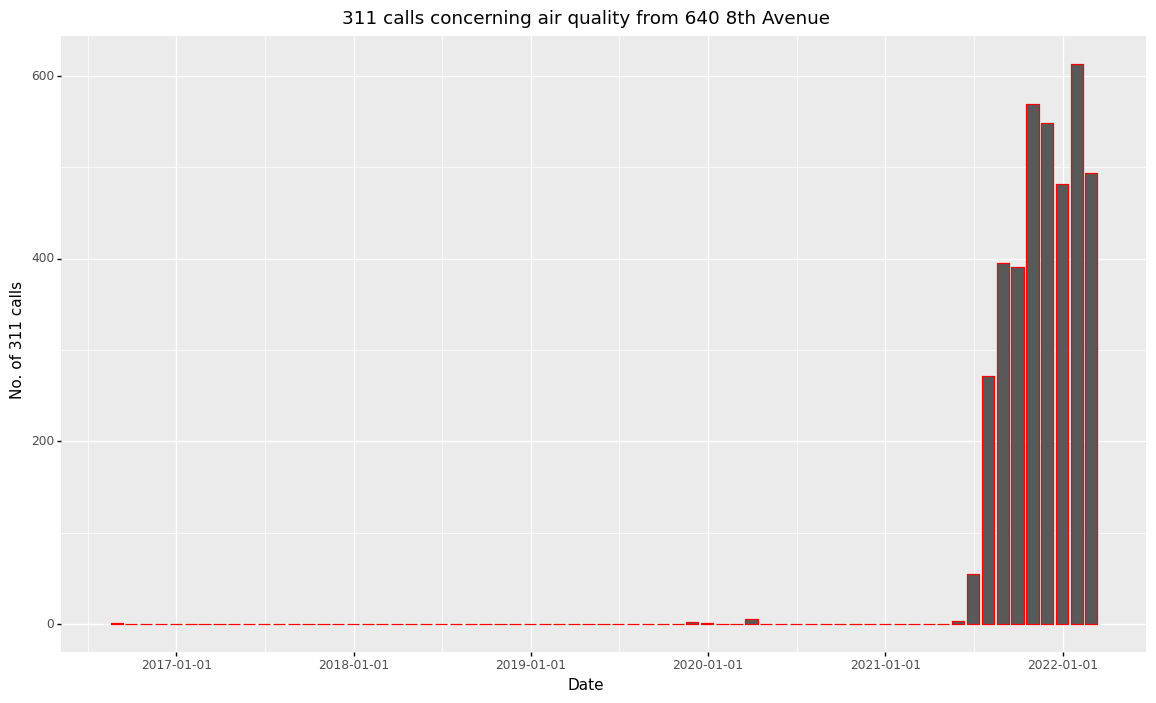

<ggplot: (310623857)>

In [66]:
(
    ggplot(avenue, aes('created_date', 'unique_key')) +
    geom_col(color="red", stat='identity') +
    theme(figure_size=(14,8)) +
    labs(x='Date', y='No. of 311 calls', title='311 calls concerning air quality from 640 8th Avenue')
)

In [39]:
manhattan[manhattan.created_date<="2022-02-01"].groupby('descriptor') \
.incident_address \
.value_counts() \
.sort_values(ascending=False)

descriptor                             incident_address    
Air: Odor/Fumes, Vehicle Idling (AD3)  640 8 AVENUE            3336
Air: Odor/Fumes, Restaurant (AD2)      304 WEST  117 STREET     143
                                       399 PARK AVENUE          118
Air: Smoke, Chimney or vent (AS1)      449 WEST   44 STREET      84
Air: Odor/Fumes, Restaurant (AD2)      910 9 AVENUE              84
                                                               ... 
Air: Odor/Fumes, Vehicle Idling (AD3)   LISPENARD STREET          1
                                        LEXINGTON AVE             1
                                        LAGUARDIA PL              1
                                        HENRY HUDSON NB           1
Air: Soot, Other (Use Comments) (AB4)  EAST   86 STREET           1
Name: incident_address, Length: 31348, dtype: int64

# End